### **Data exploration: Diabetes**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import pickle
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Paso 1:
**Problema**: El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

**Descripción**: Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. 

Para abordar este problema crearemos un algoritmo que ayude a predecir si un cliente tiene o no diabetes.

**Variables:**

> - Pregnancies. Número de embarazos del paciente (numérico)
> - Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)
> - BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)
> - SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)
> - Insulin. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)
> - BMI. Índice de masa corporal (numérico)
> - DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)
> - Age. Edad del paciente (numérico)
> - Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)

### Paso 2: Recopilación de datos

In [2]:
df = pd.read_csv('/workspaces/GuilloMansa-MachineLearning/data/raw/diabetes.csv', sep=',')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Paso 3: Análisis descriptivo

In [3]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(None, (768, 9))

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
List_num = df.select_dtypes(include=['float64','int64']).columns.tolist()

In [6]:
List_num

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

> ### Observaciones:
>
> - Existen un total de 768 filas (personas) y 9 columnas, entre las cuales encontramos el target 'Outcome': tiene o no tiene diabetes.
> - No hay valores nulos en ninguna variable, pero vemos que hay varios ceros que se interpretan como valores faltantes.
> - Los datos cuentan con todas características numéricas.

### Paso 4: Limpieza de datos

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.drop_duplicates(), df.duplicated().sum()


(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              6      148             72             35        0  33.6   
 1              1       85             66             29        0  26.6   
 2              8      183             64              0        0  23.3   
 3              1       89             66             23       94  28.1   
 4              0      137             40             35      168  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763           10      101             76             48      180  32.9   
 764            2      122             70             27        0  36.8   
 765            5      121             72             23      112  26.2   
 766            1      126             60              0        0  30.1   
 767            1       93             70             31        0  30.4   
 
      DiabetesPedigreeFunction  Age  Outcome  
 0                       0.627   50        1  
 1  

### Paso 5: Análisis de variables y Paso 6: Ingeniería de características

In [10]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

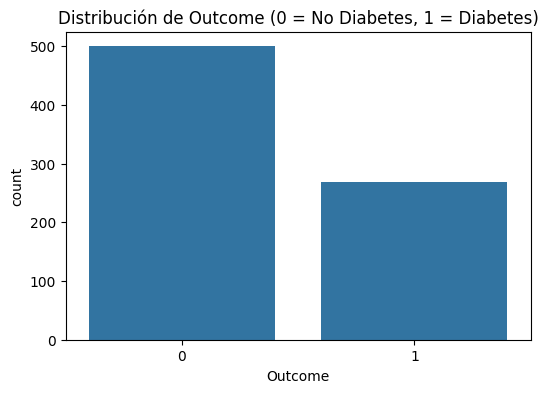

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x="Outcome", data=df)
plt.title("Distribución de Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.show()


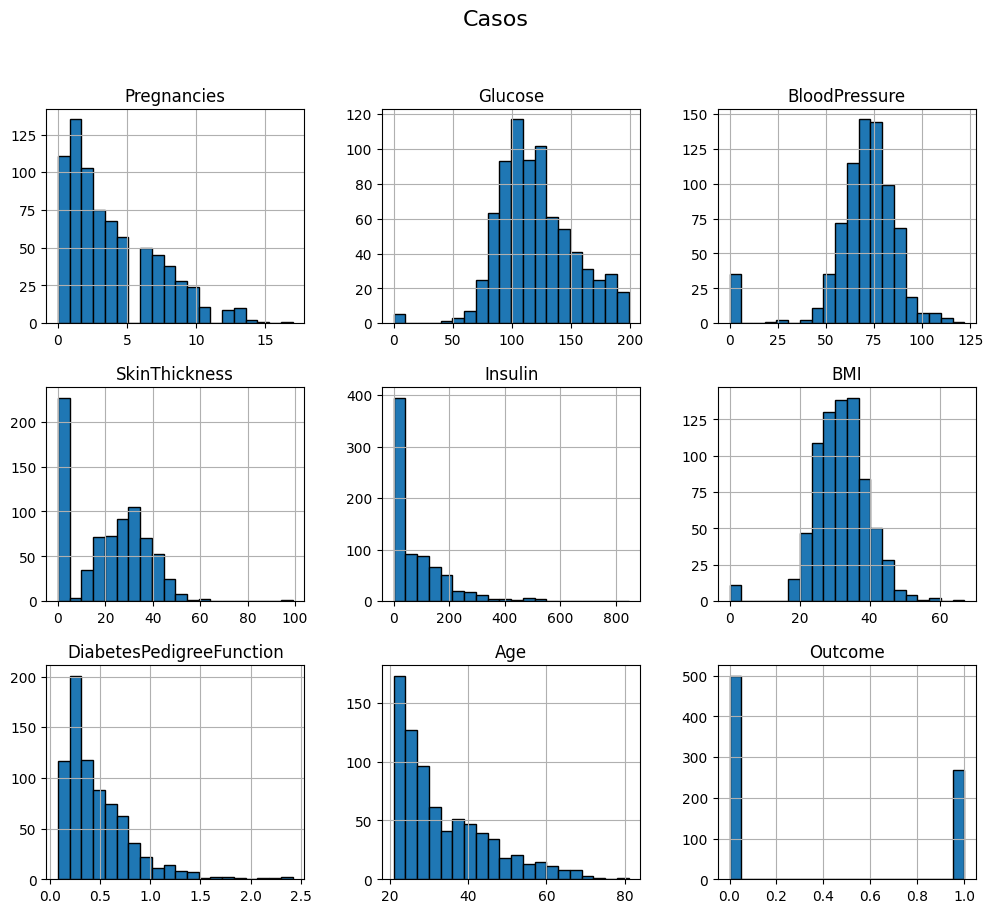

In [13]:
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Casos", fontsize=16)
plt.show()
# KDE más suave


plt.show()


- Se observan ceros en variables donde no deberia haber como glucosa, bloodpressure, bmi, insulin y skin thickness. Que es clinicamente imposible.

- Creamos un nuevo dataframe copiando el anterior donde tomaremos los ceros de nuestras variables mas importantes glucosa, insulina e indice corporal para reemplazarlos por valores promedios.

In [14]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','Insulin','BMI']] = df_copy[['Glucose','Insulin','BMI']].replace(0,np.nan)

## mostrar cantidad de Null
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
df_copy['Glucose'] = df_copy['Glucose'].fillna(df_copy['Glucose'].mean())
df_copy['Insulin'] = df_copy['Insulin'].fillna(df_copy['Insulin'].median())
df_copy['BMI'] = df_copy['BMI'].fillna(df_copy['BMI'].median())

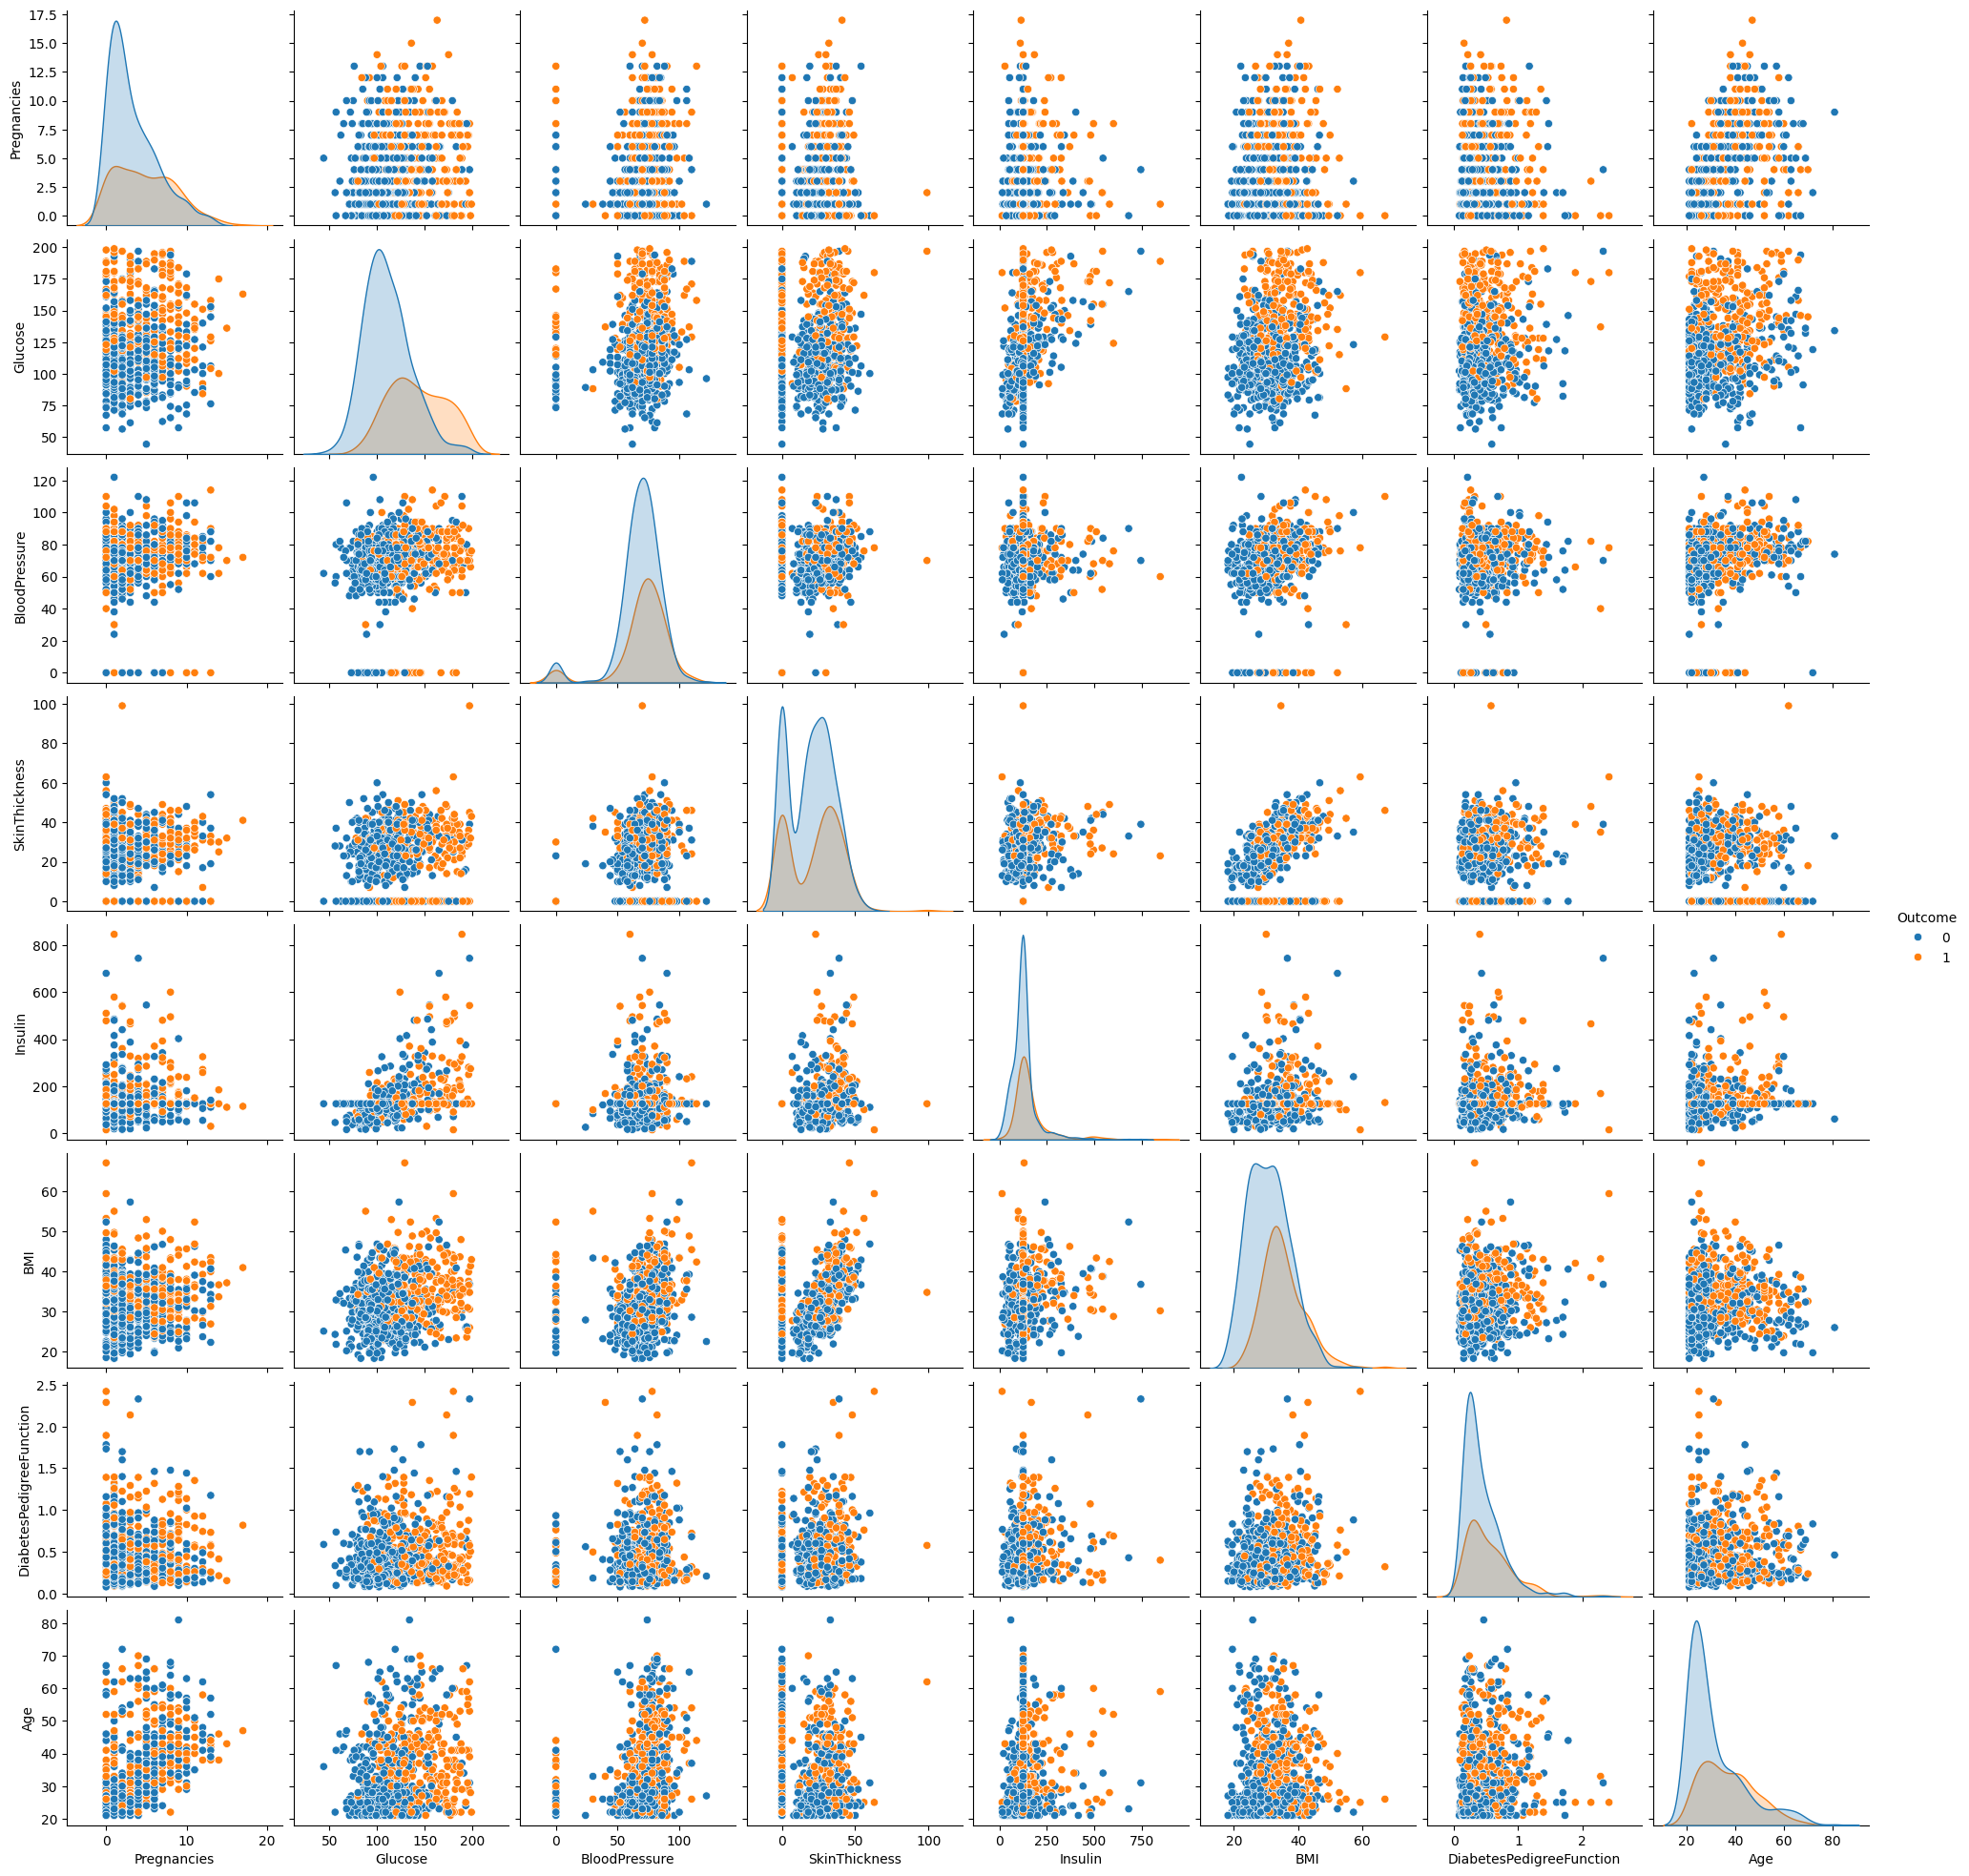

In [16]:
sns.pairplot(df_copy, hue="Outcome", diag_kind="kde")
plt.show()


#### - Observaciones:
- La glucosa es claramente discriminante. La media de glucosa es 121, va hasta 199.
- Es altamente probable que la glucosa sea la variable más importante para el modelo.
- Outcome = 1 representa un tercio del dataset.
- Insulin presenta mucha variabilidad. Desviación estándar muy alta (115).
- BMI es generalmente alto. Media de 32, que es obesidad.
- Esto confirma la relación conocida entre obesidad y diabetes.
- SkinThickness muestra demasiados ceros.
- BloodPressure media 69, lo cual es razonable.
- La edad tiene una distribución amplia, pacientes entre 21 y 81 años. Probablemente la frecuencia de Outcome = 1 aumente con la edad.

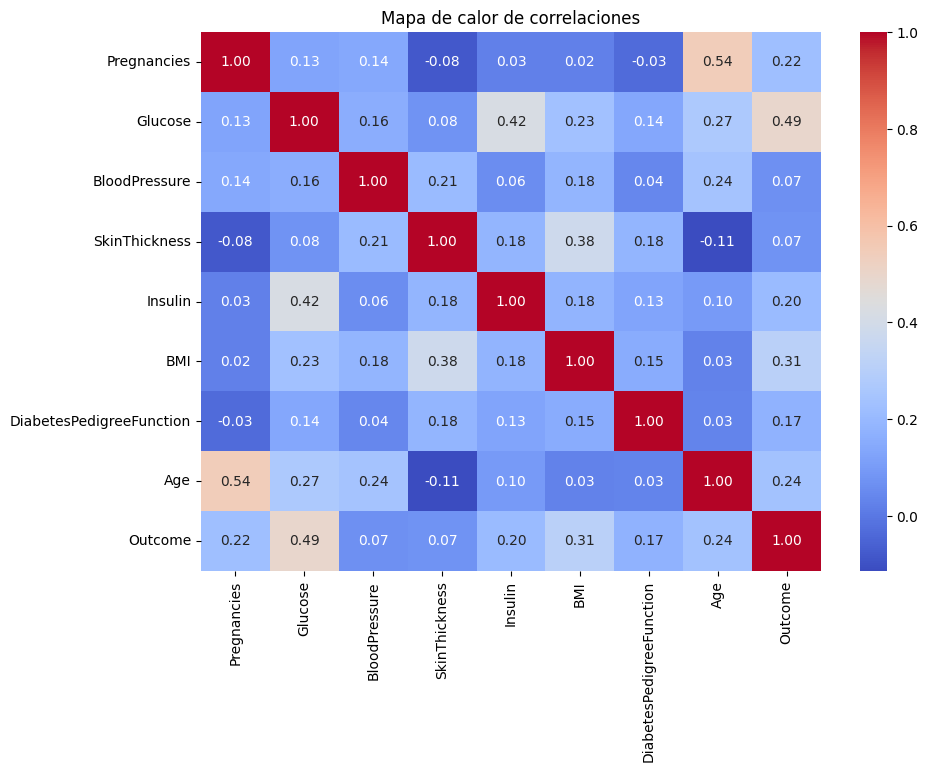

In [17]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_copy.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()


### **Obersvaciones:**
- La variable mas fuerte en correlacion es glucose con 0.49, luego el bmi con 0.31 y seguido ligeramente por la edad y la insulina.

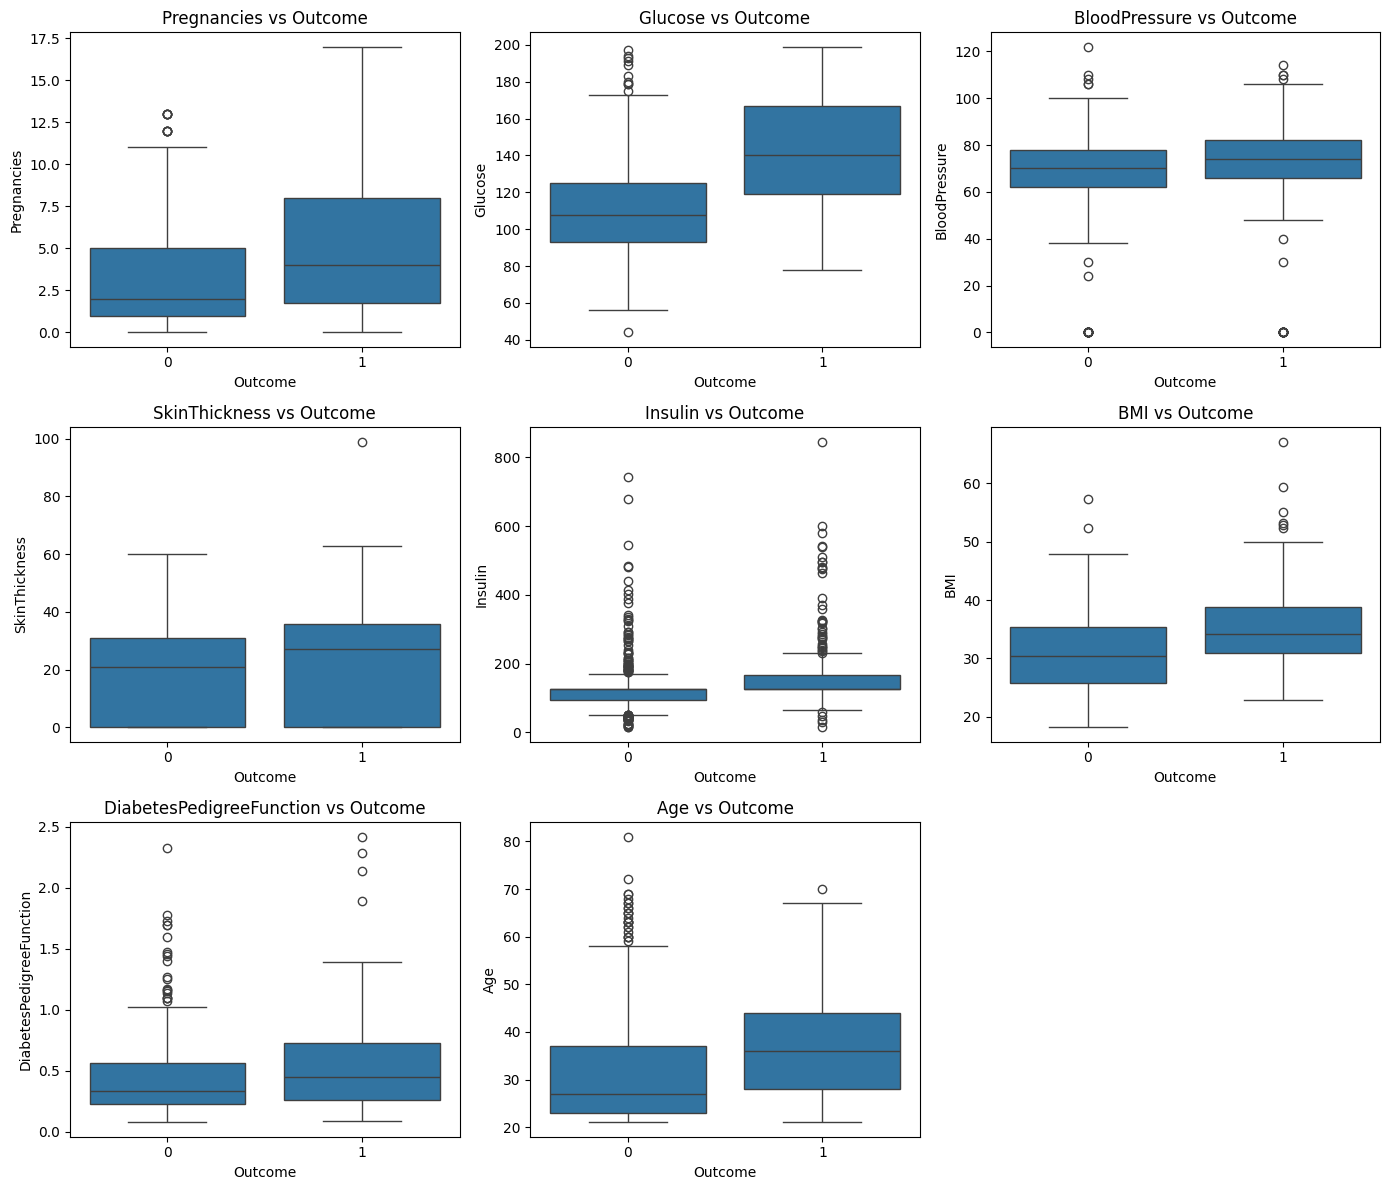

In [18]:
plt.figure(figsize=(14, 12))
for i, col in enumerate(df_copy.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_copy, x="Outcome", y=col)
    plt.title(f"{col} vs Outcome")

plt.tight_layout()
plt.show()

- Se observan ceros en variables donde no deberia haber como glucosa, bloodpressure, bmi, insulin y skin thickness. Que es clinicamente imposible.

In [19]:
df_copy.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,121.69,30.44,44.00,99.75,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,140.67,86.38,14.00,121.50,125.00,127.25,846.00
BMI,768.0,32.46,6.88,18.20,27.50,32.30,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


In [20]:
df_copy.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
q1 = df[['Age', 'BloodPressure','Glucose','Insulin','DiabetesPedigreeFunction','BMI']].quantile(0.25)
q3 = df[['Age','BloodPressure','Glucose','Insulin','DiabetesPedigreeFunction','BMI']].quantile(0.75)
iqr = q3 - q1
# se definen limites de estudio para garantizar dejar afuera outliers
lower_limit = (q1 - 1.5 * iqr).clip(lower=0)
upper_limit = q3 + 1.5 * iqr

limites = pd.DataFrame({"Q1": q1.round(2),"Q3": q3.round(2),"IQR": iqr.round(2),"Lower": lower_limit.round(2),"Upper": upper_limit.round(2),})

limites

,Q1,Q3,IQR,Lower,Upper
Age,24.00,41.00,17.00,0.00,66.50
BloodPressure,62.00,80.00,18.00,35.00,107.00
Glucose,99.00,140.25,41.25,37.12,202.12
Insulin,0.00,127.25,127.25,0.00,318.12
DiabetesPedigreeFunction,0.24,0.63,0.38,0.00,1.20
BMI,27.30,36.60,9.30,13.35,50.55


In [22]:
X = df_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']]
y = df_copy['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
29,5,117.0,92,0,125.0,34.1,0.337,38
286,5,155.0,84,44,545.0,38.7,0.619,34
35,4,103.0,60,33,192.0,24.0,0.966,33
392,1,131.0,64,14,415.0,23.7,0.389,21
12,10,139.0,80,0,125.0,27.1,1.441,57


In [23]:
X_train.to_csv("/workspaces/GuilloMansa-MachineLearning/data/processed/X_train_diabetes.csv", index=False)
X_test.to_csv("/workspaces/GuilloMansa-MachineLearning/data/processed/X_test_diabetes.csv", index=False)
y_train.to_csv("/workspaces/GuilloMansa-MachineLearning/data/processed/y_train_diabetes.csv", index=False)
y_test.to_csv("/workspaces/GuilloMansa-MachineLearning/data/processed/y_test_diabetes.csv", index=False)

In [24]:
eda_db = pd.DataFrame(df)

eda_db.to_csv('/workspaces/GuilloMansa-MachineLearning/data/processed/eda_db.csv', index=False)